In [1]:
# Link para download do Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/versions/1?resource=download

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

dados = pd.read_csv('heart.csv', sep=',')

In [ ]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Shape: Linhas e colunas
dados.shape

(918, 12)

In [ ]:
# Contando os valores da coluna 'Age' classificando por índice
dados['Age'].value_counts().sort_index()

Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64

In [ ]:
hist1 = px.histogram(dados, x = 'Age', nbins = 60)
hist1.update_layout(width=800, height = 500, title_text = 'Distribuição das idades')
hist1.show()

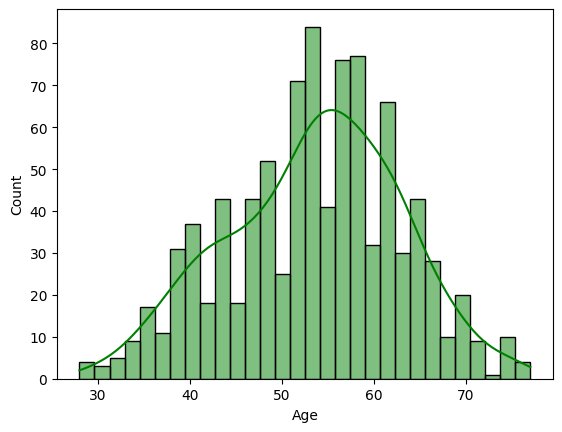

In [ ]:
sns.histplot(dados, x='Age', bins=30, color='green', kde='True', stat='count');

In [ ]:
# Contando os dados da coluna Sexo
dados['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

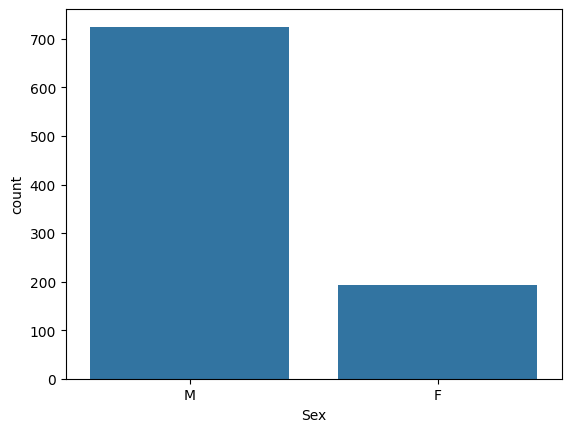

In [ ]:
sns.countplot(x='Sex', data=dados);

In [ ]:
dados['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

ASY: Assintomático
NAP: Dor não anginosa
ATA: Angina atípica
TA: Angina típica

Angina: Dor no peito causada pela diminuição do fluxo de sangue no coração

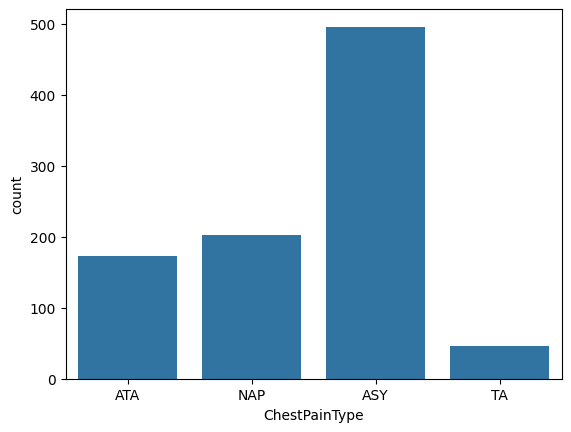

In [ ]:
### Idade usa countplot por ser valor discreto (1, 2, 3, etc.)
sns.countplot(dados, x='ChestPainType');

##### Resting BP: Pressão sanguínea em repouso em mmHG(sistólica)

In [ ]:
dados.RestingBP.value_counts().sort_index()

RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64

* Há valor zero na pressão, o que está errado

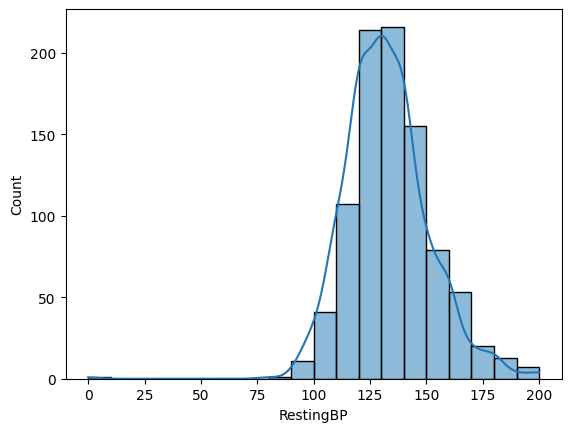

In [ ]:
### Pressão sistólica usa histograma para analisar a distribuição por ter valores contínuos (8.5, 9.2, etc.)
sns.histplot(dados, x='RestingBP', kde = True, bins = 20, stat='count');
# Eixo y utiliza count (contagem)

* Tendência de distribuição normal

#### Cholesterol

<Axes: xlabel='Cholesterol', ylabel='Count'>

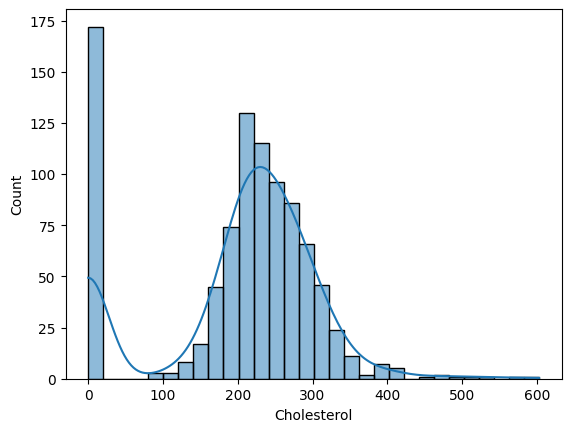

In [ ]:
dados.Cholesterol.value_counts().sort_index()
sns.histplot(dados, x='Cholesterol', kde=True, bins = 30, stat='count')

* Possui valores zero

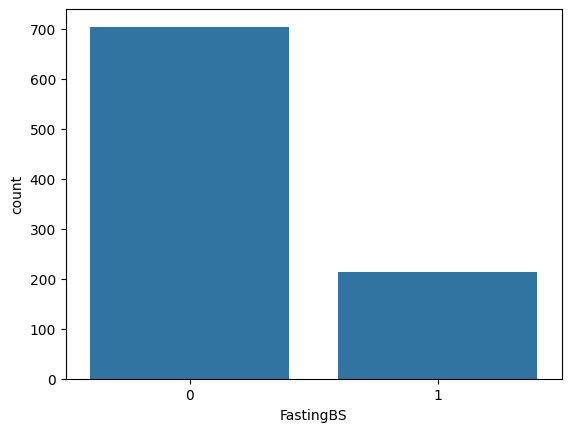

In [ ]:
#### Fasting BS: Açucar no sangue em jejum (mg/dl)
dados.FastingBS.value_counts().sort_index()
sns.countplot(dados, x='FastingBS');


### 0: <120mg/dl (não diabético)
### 1: >=120mg/dl (diabético)

* Variável categórica ordinal

In [ ]:
### Resting ECG: Eletrocardiograma em repouso
dados.RestingECG.value_counts().sort_index()

### Normal: Normal
### LVH: Hipertrofia ventricular esquerda
### ST: Anormalidade da onda ST-T

RestingECG
LVH       188
Normal    552
ST        178
Name: count, dtype: int64

* Segmento ST: Qualquer desnível do segmento ST, para cima (supradesnível) ou para baixo (infradesnível), deve ser avaliado pois pode corresponder a um infarto agudo do miocárdio.

<Axes: xlabel='RestingECG', ylabel='count'>

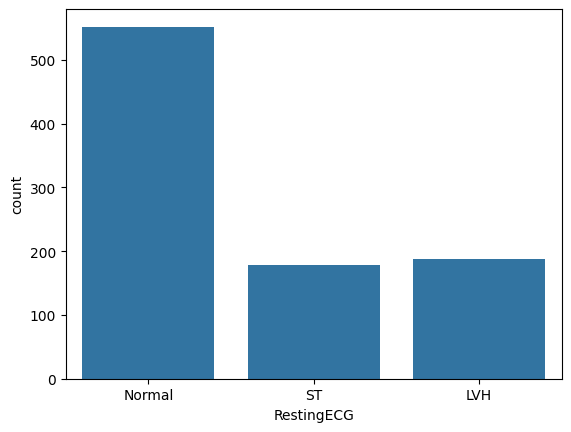

In [ ]:
sns.countplot(dados, x='RestingECG')

#### MaxHr: Frequência cardíaca máxima

In [ ]:
dados.MaxHR.value_counts()

MaxHR
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: count, Length: 119, dtype: int64

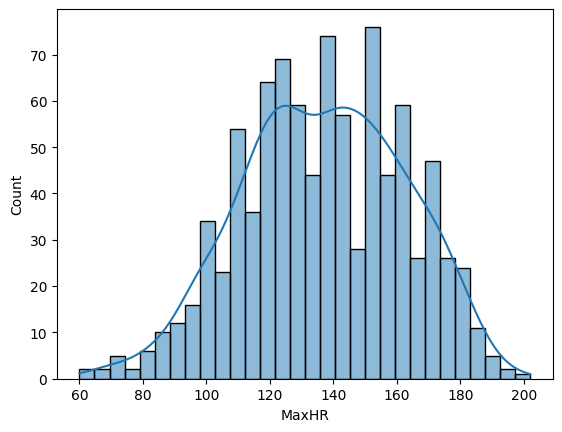

In [ ]:
sns.histplot(dados, x='MaxHR', bins = 30, stat = 'count', kde=True);

##### Exercise Angina: Angina induzida por exercício

In [ ]:
dados['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [ ]:
px.pie(dados, 'ExerciseAngina')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'ExerciseAngina=%{label}<extra></extra>',
              'labels': array(['N', 'N', 'N', ..., 'Y', 'N', 'N'], shape=(918,), dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

##### Old Peak: Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso

In [ ]:
dados['Oldpeak'].value_counts()

Oldpeak
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: count, dtype: int64

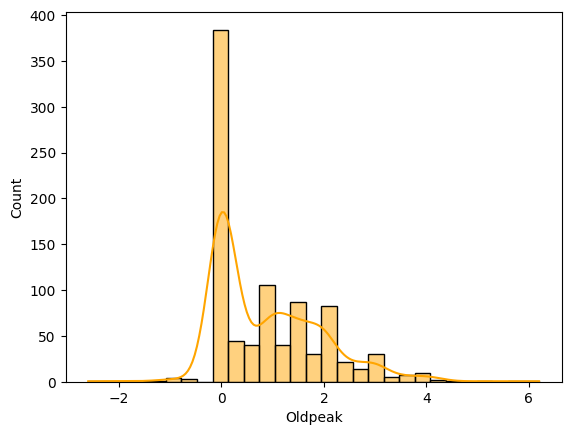

In [ ]:
sns.histplot(dados, x='Oldpeak', kde = True, color = 'orange', stat='count');

##### ST_Slope: Inclinação do segmento ST no ECG

In [ ]:
dados['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [ ]:
px.pie(dados, 'ST_Slope')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'ST_Slope=%{label}<extra></extra>',
              'labels': array(['Up', 'Flat', 'Up', ..., 'Flat', 'Flat', 'Up'],
                              shape=(918,), dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

##### Heart Disease: Doença Cardíaca

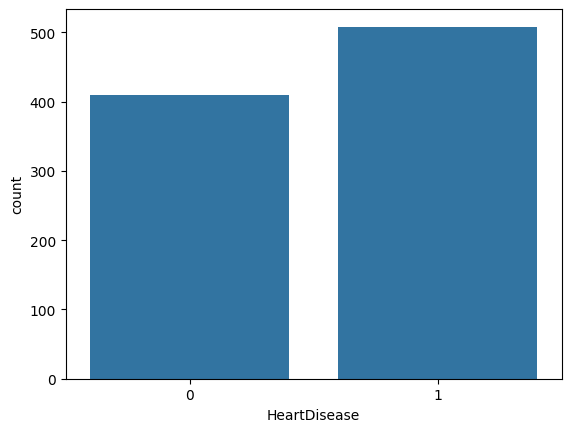

In [ ]:
dados.HeartDisease.value_counts()
sns.countplot(dados, x='HeartDisease');

#### Análise dos tipos de atributos

In [ ]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos

dados.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

#### Valores Missing (NaN)

In [ ]:
dados.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
### Substituindo pela média
dados.Age.fillna(dados['Age'].mean())

0      40
1      49
2      37
3      48
4      54
       ..
913    45
914    68
915    57
916    57
917    38
Name: Age, Length: 918, dtype: int64

In [2]:
### Análises Estatítistcas Descritivas
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000
